In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
puntos = np.array([[0,0], [0, 0.5], [1, 0.5], [0.5, 0.5]])
puntos

array([[0. , 0. ],
       [0. , 0.5],
       [1. , 0.5],
       [0.5, 0.5]])

In [ ]:
puntos[:, 0]

array([0. , 0. , 1. , 0.5])

In [ ]:
puntos[:, 1]

array([0. , 0.5, 0.5, 0.5])

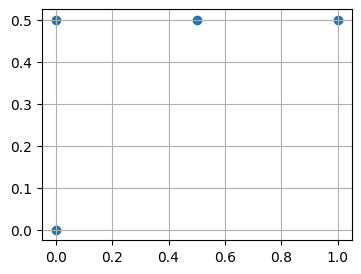

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid()
plt.show()

## Modelo **K = 1**

In [ ]:
veci = NearestNeighbors(n_neighbors=1)
veci.fit(puntos)

NearestNeighbors(n_neighbors=1)

Distancia al más cercano e índice del punto más cercano

In [ ]:
# prueba = [[0.5 , 0]]
prueba = [[0.25 , 0.2], [0.5, 0.3]]
veci.kneighbors(prueba)

(array([[0.32015621],
        [0.2       ]]),
 array([[0],
        [3]]))

In [ ]:
puntos[0]

array([0., 0.])

In [ ]:
posicion = veci.kneighbors(prueba)[1][0][0]

Distancia al más cercano 0.32015621187164245
El punto más cercano es [0. 0.]


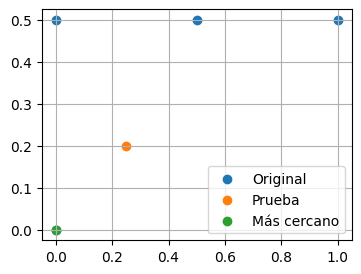

In [ ]:
print(f"Distancia al más cercano {veci.kneighbors(prueba)[0][0][0]}")
print(f"El punto más cercano es {puntos[posicion]}")
plt.figure(figsize=(4,3))
plt.scatter(puntos[:,0], puntos[:,1], label="Original")
plt.scatter(prueba[0][0], prueba[0][1], label="Prueba")
plt.scatter(puntos[posicion][0], puntos[posicion][1], label="Más cercano")
plt.grid()
plt.legend()
plt.show()

------------------------


Clase 22 de Septiembre 2023

Ejemplos con DataFrames

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
X[0, :]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
prueba = np.array([[5, 2.9, 1, 0.2]])
print(prueba , prueba.shape)

[[5.  2.9 1.  0.2]] (1, 4)


In [ ]:
knn.predict(prueba)

array([0])

In [ ]:
print(f"El dato {prueba} se clasifica como tipo {knn.predict(prueba)[0]}")

El dato [[5.  2.9 1.  0.2]] se clasifica como tipo 0


In [ ]:
print(f"El dato {prueba} se clasifica como "
      + f"tipo {iris.target_names[knn.predict(prueba)[0]]}")

El dato [[5.  2.9 1.  0.2]] se clasifica como tipo setosa


Tres elementos para ML

- Definir una tarea $\checkmark$

- Algoritmo trabajar en torno a la tarea $\checkmark$

- Evaluar desempeño $\times$

**Se habla de *aprendizaje* cuando el desempeño del algoritmo mejora.**

El desempeño de las predicciones debe mejorar con la experiencia (DATOS)

### Proceso de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X, y, random_state=23)

In [ ]:
X.shape

(150, 4)

In [ ]:
x_train.shape , y_train.shape

((112, 4), (112,))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_train

array([1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 2])

In [ ]:
print(f"Resultado de predicción del entrenamiento: {100 * np.mean(y_pred_train == y_train):.2f} %")

Resultado de predicción del entrenamiento: 97.32 %


In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1])

In [ ]:
y_test

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1])

In [ ]:
print(f"Resultado de predicción del algoritmo: {100 * np.mean(y_pred == y_test):.2f} %")

Resultado de predicción del algoritmo: 97.37 %


In [ ]:
print(f"Se evaluaron bien {np.sum(y_pred == y_test)} datos " +
      f"de un total de {len(y_test)}.")

Se evaluaron bien 37 datos de un total de 38.
